## Comparing the representational similarity of objects in human visual systems and deep convolutional neural networks

In [62]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy, os
import rsatoolbox as rsa 

%matplotlib inline 

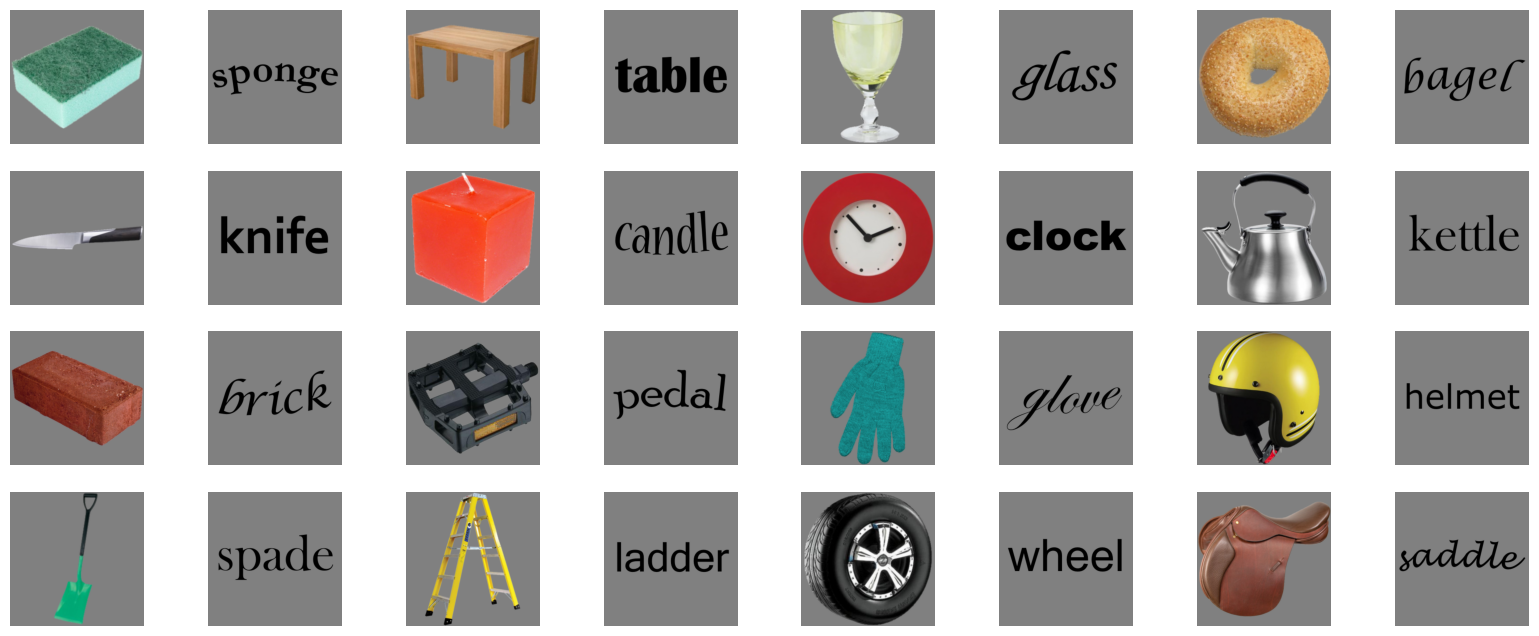

In [49]:
# showing all the stimuli

file_names = ['ScreenShot339_masked_rs.bmp',    'sponge.bmp',   'ScreenShot350_masked_rs.bmp',  'table.bmp',    'ScreenShot308_masked_rs.bmp',  'glass.bmp',    'ScreenShot175_masked_rs.bmp',  'bagel.bmp', 
              'ScreenShot351_masked_rs.bmp',    'knife.bmp',    'ScreenShot344_masked_rs.bmp',  'candle.bmp',   'ScreenShot304_masked_rs.bmp',  'clock.bmp',    'ScreenShot317_masked_rs.bmp',  'kettle.bmp',
              'ScreenShot343_masked_rs.bmp',    'brick.bmp',    'ScreenShot353_masked_rs.bmp',  'pedal.bmp',    'ScreenShot287_masked_rs.bmp',  'glove.bmp',    'ScreenShot338_masked_rs.bmp',  'helmet.bmp',
              'ScreenShot207_masked_rs.bmp',    'spade.bmp',    'ScreenShot195_masked_rs.bmp',  'ladder.bmp',   'ScreenShot241_masked_rs.bmp',  'wheel.bmp',    'ScreenShot279_masked_rs.bmp',  'saddle.bmp']

fig, axs = plt.subplots(4, 8, figsize=(20, 8))

for i in np.arange(len(file_names)):
    img = plt.imread(os.path.join('stimuli', file_names[i]))
    axs.ravel()[i].imshow(img) 
    axs.ravel()[i].set_axis_off() 

fig 

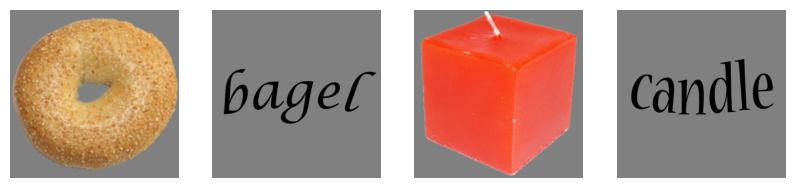

In [12]:
# example stimuli (objects and words describing the objects)
img_bagel = os.path.join('stimuli', 'ScreenShot175_masked_rs.bmp')
word_bagel = os.path.join('stimuli', 'bagel.bmp')

img_candle = os.path.join('stimuli', 'ScreenShot344_masked_rs.bmp')
word_candle = os.path.join('stimuli', 'candle.bmp')

fig, axs = plt.subplots(1, 4, figsize=(10, 4))

img = plt.imread(img_bagel)
axs[0].imshow(img)
axs[0].set_axis_off()

img = plt.imread(word_bagel)
axs[1].imshow(img)
axs[1].set_axis_off()

img = plt.imread(img_candle)
axs[2].imshow(img)
axs[2].set_axis_off()

img = plt.imread(word_candle)
axs[3].imshow(img)
axs[3].set_axis_off()

fig 

In [14]:
MAT_RDMs_neural_data = os.path.join('deepNets', 'RDMs_neural_data.mat')
RDMs_neural = scipy.io.loadmat(MAT_RDMs_neural_data)
RDMs_neural.keys()

dict_keys(['__header__', '__version__', '__globals__', 'RDMs_subjAvg_region', 'RDMs_subj_region', 'ROInames'])

In [29]:
ROI_names = [''.join(x) for x in RDMs_neural['ROInames'][0]]
n_ROIs = len(ROI_names)
ROI_names

['V1', 'V2', 'V3', 'V4', 'IT', 'IPS', 'IFJ']

In [30]:
RDMs_neural['RDMs_subjAvg_region'].shape

(128, 128, 7)

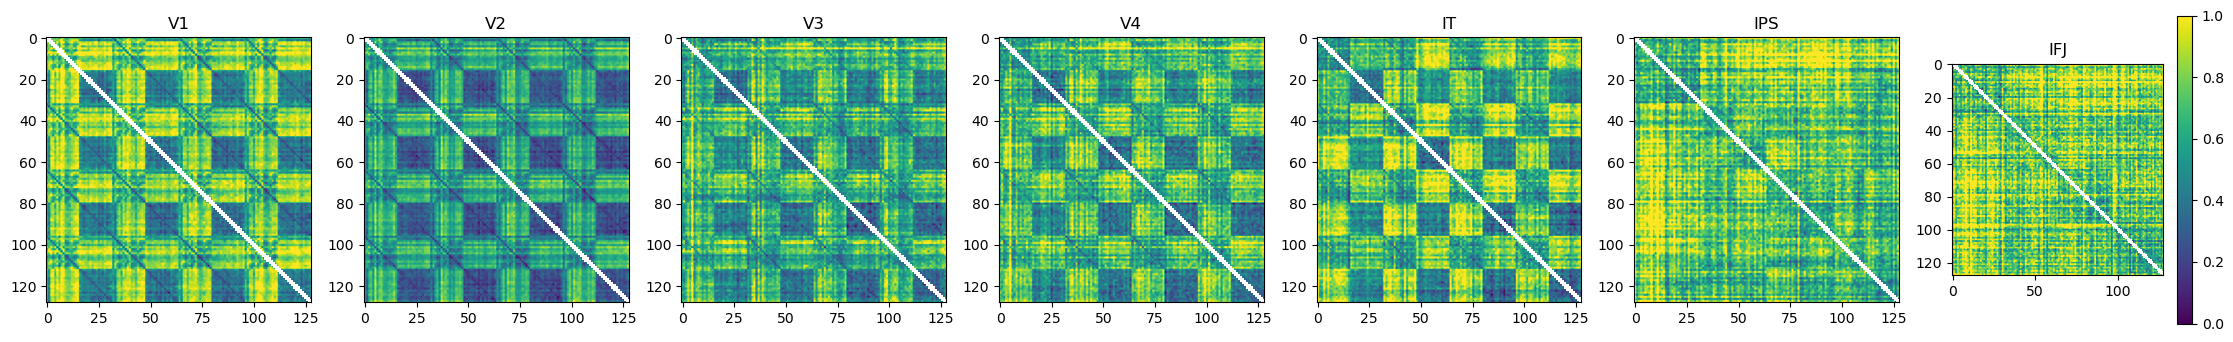

In [41]:
# showing the average RDMs across subjects (32 stimuli x 4 tasks = 128 task conditions)
fig, axs = plt.subplots(1, 7, figsize=(28, 4))

for i in np.arange(n_ROIs):
    rdm = RDMs_neural['RDMs_subjAvg_region'][:,:,i].squeeze()
    rdm = (rdm - np.nanmin(rdm)) / np.nanmax(rdm) 
    im = axs[i].imshow(rdm, cmap='viridis', vmin=0, vmax=1)
    axs[i].set_title(ROI_names[i])
    if i == n_ROIs - 1:
        plt.colorbar(im, ax=axs[i])

fig   

In [58]:
MAT_RDMs_alexnet = os.path.join('deepNets', 'RDMs_alexnet.mat')
RDMs_alexnet_saved = scipy.io.loadmat(MAT_RDMs_alexnet)
RDMs_alexnet_saved.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cnnRDM'])

In [93]:
RDMs_alexnet = {}

for layer in RDMs_alexnet_saved['cnnRDM'][0]:    
    RDMs_alexnet[''.join(layer[1])] = scipy.spatial.distance.squareform(layer[0].flatten(), 'tomatrix')    

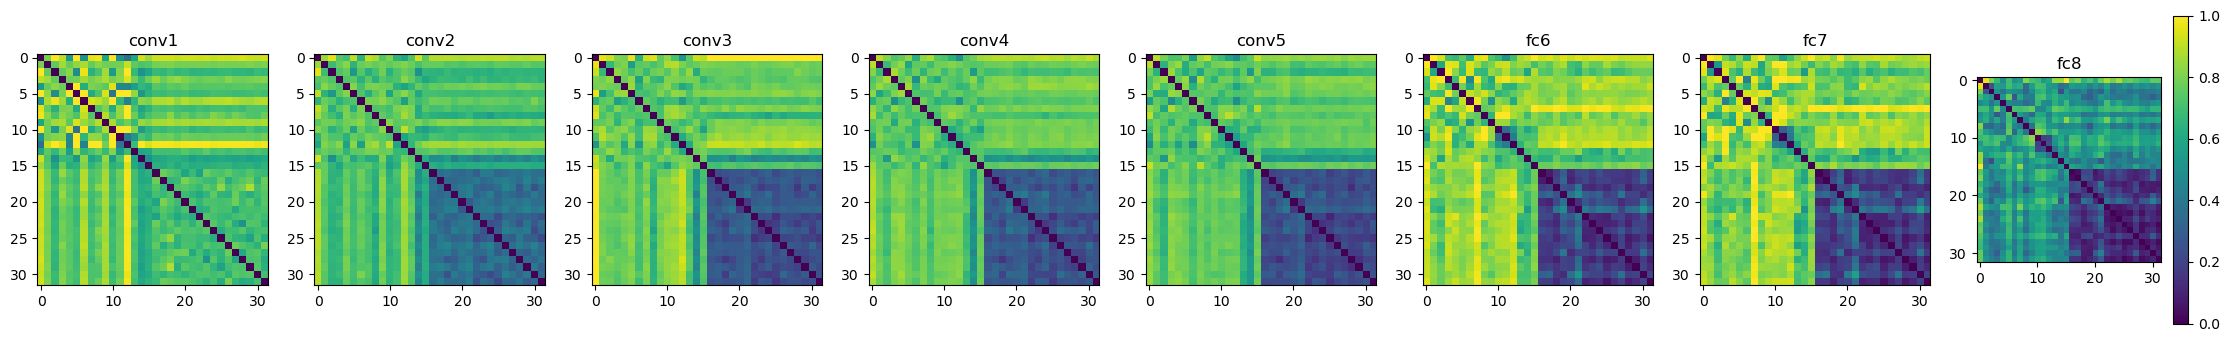

In [100]:
# plot the RDMs for each layer of alexnet 
n_layers = len(RDMs_alexnet)
layer_names = list(RDMs_alexnet.keys())

fig, axs = plt.subplots(1, n_layers, figsize=(28, 4))

for i in np.arange(n_layers):
    rdm = RDMs_alexnet[layer_names[i]]
    im = axs[i].imshow(rdm, cmap='viridis', vmin=0, vmax=1)
    axs[i].set_title(layer_names[i])
    if i == n_layers - 1:
        plt.colorbar(im, ax=axs[i])

fig 